### *АВТ-910_ЛР-1_Безденежных_Васильев*

## Цель работы
Получить практические навыки работы по решению задачи первичного анализа «сырых» данных, подготовки массива к обработке, выявления и описания зависимостей в исходных данных с использованием языка программирования.

## Ход работы
Ознакомиться с методическими материалами и примерами выполнения команд.
Последовательно выполнить следующие шаги применительно к выборке данных, согласно варианту задания:

1. Работа с данными 

  1. Получить \*.csv-файл с исходными данными согласно варианту. С помощью текстового редактора определить наличие заголовка и знак-разделитель столбца

  2. С помощью библиотеки pandas создать таблицу (объект Dataframe) на основе \*.csv-файла с исходными данными

  3. Провести первичный анализ всех данных. Получить размер исходный таблицы

  4. Определить наличие пропусков и выбрать способ их обработки. Получить размер таблицы после обработки пропусков 

  5. Определить наличие и привести нужные для работы признаки к числовому типу

  6. Сохранить в виде файла текущее состояние обработанной таблицы (Dataframe)


2. Выбор и обработка признаков

  1. Проверить взаимозависимость всех числовых признаков на основе матрицы корреляции

  2. Выбрать целевую переменную 'y' и независимые признаки 'x1, x2, x3, ...', оказывающие на нее влияние (целевая - 1 шт., признаки>=2 шт.) 

  3. Исключить выбросы

  4. Сформировать обучающую и проверочную части выборки


10. Построить линейные регрессионные модели для каждого выбранной комбинации признаков :
  - m1: от единственного ЕДИНСТВЕННОЙ переменной (x1) на НЕ стандартизированных  данных
  - m2: от множества НАБОРА#1 переменных (пример: x1, x2, x3) на НЕ стандартизированных данных
  - m3: от множества НАБОРА#2 переменных (пример: x5, x6, x7) на НЕ стандартизированных данных

11. Выполнить анализ полученных моделей:

  1. Получить коэффициенты линейной регрессии y(x) = K*x + B

  2. Получить оценку точности R2(коэфф. детерминации) и RMSE (среднеквадратичное отклонение)

  3. Нанести график прямой y(x) = K*x + B поверх точечной диаграммы (выбранный признак, целевая переменная)
  
  4. Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test
  
  5. Построить гистограмму остатков (разностей между Y_pred и Y_test)
  
12. \* В качестве доп. задания предлагается расширить множество формируемых моделей.

# Работа с данными
## Подключение библиотек
Перед началом работы убедитесь, что необходимые для работы пакеты установлены в системе. Для установки отсутствующих используйте команду:
- pip install numpy pandas sklearn seaborn matplotlib
- pip install jupyterlab

Назначение библиотек:
* numpy - обработка многомерных массивов, линейная алгебра, преобразование Фурье, случайные числа
* pandas - обработка (загрузка, сохранение, анализа) данных 
* seaborn - визуализация данных (на базе matplotlib)
* sklearn - (классификация, регрессия, кластеризация...)
* scipy - пакет для выполнения научных и инженерных расчётов.

In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

## Загрузка входных данных

Данные "Bike sharing dataset" содержат информацию об аренде велосипедов
- instant: record index (?).
- dteday : Дата аренды.
- season : Время года (1:весна, 2:лето, 3:осень, 4:зима). __+__
- yr : Год (0: 2011, 1:2012). 
- mnth : Месяц (от 1 до 12). __+__
- hr : Час (от 0 до 23). __+__
- holiday : Праздничный день или нет.
- weekday : День недели. __+__
- workingday : Если день не выходной и не праздничный - 1, иначе 0.
+ weathersit : Сила осадков. __+__
    - 1: Штиль, малооблачно, частичная облачность.
    - 2: Туман и облака, туман + кучевые облака, Туман и малооблачность, туман.
    - 3: Небольшой снег, лёгкий дождь + гроза + кучевые облака, лёгкий дождь + кучевые облака.
    - 4: Ливень + мелкий град + гром + туман, снег + туман.
- temp : Нормированная температура в Цельсиях. __+__
- atemp: Нормированная ощущаемая температура в Цельсиях.
- hum: Нормированная влажность. __+__
- windspeed: Нормированная скорость ветра.
- casual: Количество случайных клиентов.
- registered: Количество зарегистрированных клиентов.
- cnt: Количество арендованных велосипедов, вне зависимости от типа клиентов.

Для загрузки табличных данных из файла применятся функция .read_csv() с указанием параметров (путь, кодировка, разделитель, обработка колонок с заголовками или датой...)

In [2]:
df = pd.read_csv('./assets/datasets/var20/bike-sharing-dataset_nan.zip', # путь к файлу, (используй автодотолнение)
                   sep=',', # разделитель данных в файле
                   #  header= {None|Целочисленное} номер строки с заголовками, нумерация с нуля
                   header=0,       #если заголовки в нулевой строке таблицы
                   #  header=None  #если заголовки отсутствуют
                   # na_values =  ['???', ' '], # доп. символы для обозначения отсутствующих значений
                )
df[:3] # отобразить первые строки таблицы df 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0


## Осмотр данных / Первичный анализ
### Размер таблицы
Свойство __DataFrame.shape__ возвращает два значения соответствующей таблице - [кол-во строк, кол-во столбов]

In [3]:
nrow = df.shape[0]
ncol = df.shape[1]
print(f'Итого: {nrow} записей, {ncol} столбцов (признаков).')

Итого: 17379 записей, 17 столбцов (признаков).


### Признаки
Метод __describe()__ выводит основные статистически  данных по каждому числовому признаку (типы int64 и float64): 
* count - число непропущенных значений, 
* mean - среднее арифметическое 
* std - стандартное отклонение (среднеквадратическое), 
* min, max - минимальное и максимальное значение 
* 0.25, 0.50, 0.75 квартили.
* unique - кол-во уникальных значения
* top - самое часто встречающееся значение
* freq - кол-во значений 'top'

In [4]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17356.000000,17351.000000,17359.000000,17363.000000,17362.000000,17363.000000,17366.000000,17365.000000,17352.000000,17357.000000,17358.000000,17362.000000,17360.000000,17359.000000,17359.000000,17357.000000
mean,8686.832335,2.501239,0.502679,6.537868,11.547921,0.028797,3.003570,0.682753,1.425542,0.497088,0.475806,0.627195,0.190102,35.676998,153.730169,189.400645
std,5016.349071,1.107213,0.500007,3.439304,6.915699,0.167240,2.005833,0.465418,0.639497,0.192555,0.171834,0.192928,0.122334,49.313807,151.304605,181.377315
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4343.750000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8686.500000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13028.250000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Названия признаков
Получим список всех столбцов, при помощи свойства __DataFrame.columns__

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

У объекта DataFrame присутствует функция isna(), которая формирует соответствующую таблицу-маску, где True|False говорит об отсутсвии значения. Над таблицей __таблицей-маской__ допустимо выполнить агрегирующую функцию __.sum()__ , при этом каждое значение TRUE будет приведено к единицы и в результате мы получим количество пропущенных элементов по каждому признаку. 

In [6]:
df.isna().sum()

instant       23
dteday        18
season        28
yr            20
mnth          16
hr            17
holiday       16
weekday       13
workingday    14
weathersit    27
temp          22
atemp         21
hum           17
windspeed     19
casual        20
registered    20
cnt           22
dtype: int64

Для понимания как распределены отсутствующие значения в исходной таблице, попробуем получить графическое изображение таблицы-маски

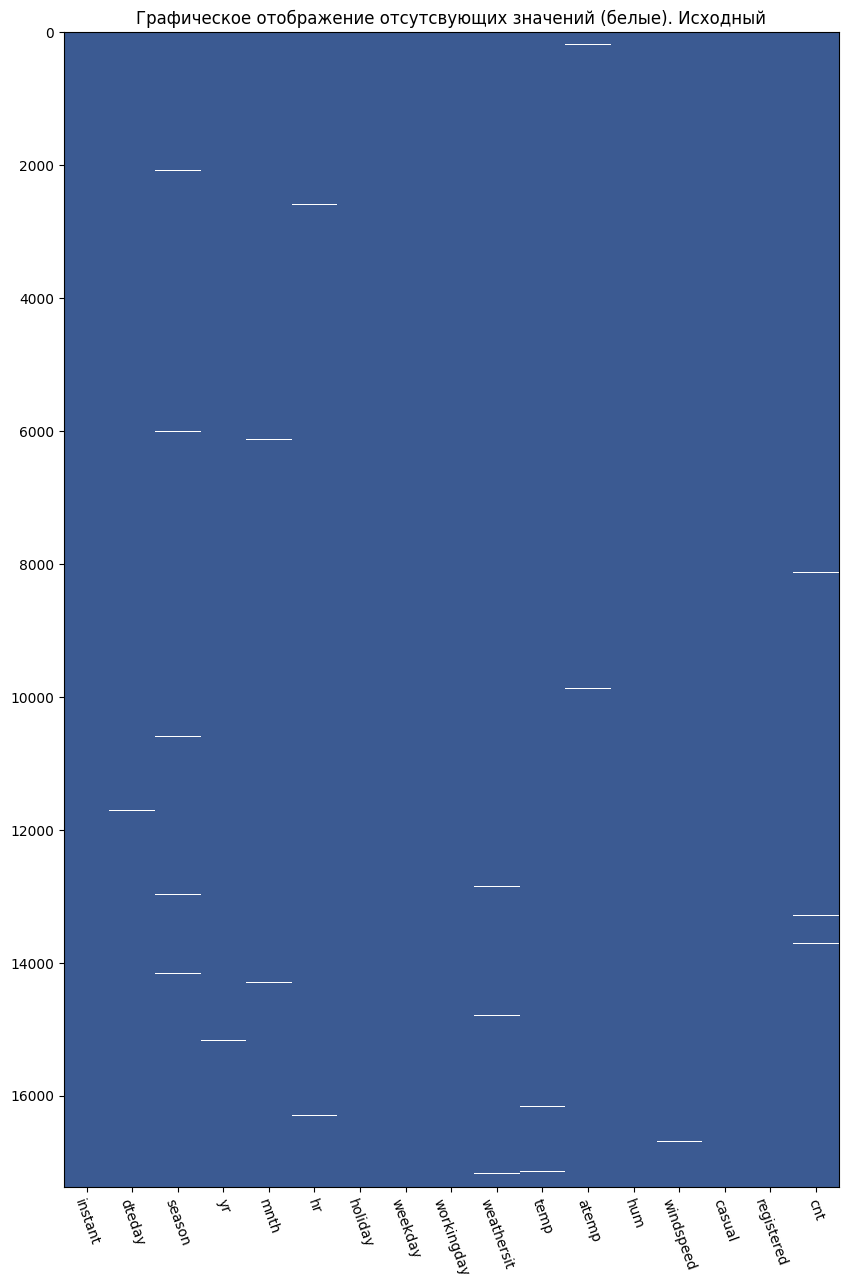

In [7]:
from matplotlib.colors import ListedColormap
def plotTableNA(dataF, addToTilte =""):
    '''  Функция для построения графика отображение отсутсвующих значений'''
    if   len(dataF.columns)> 20:   K = 3
    elif len(dataF.columns)== 1:   K = 1
    else:                          K = 1.7 
        
    figSizeH = 15        # размер полотна, высота
    figSizeW =int(len(dataF.columns)/K) # размер полотна, ширина
    fig, ax = plt.subplots( figsize=(figSizeW, figSizeH))

    # отрисовать матрицу значений функцией imshow. Применяется цветовая палитра 
    plt.imshow( dataF.isna(),
                cmap = ListedColormap([ '#3B5A92', 'white', ]), #cm.get_cmap('jet'),
                aspect='auto',  # ‘auto’ | ‘equal’ | scalar]
                interpolation= 'none',)
    ax.set_xticks(np.arange(len(dataF.columns)))
    ax.set_xticklabels(dataF.columns, rotation=-70,)
    plt.title("Графическое отображение отсутсвующих значений (белые). "+ addToTilte)

# Вызов функции с указанием параметров
plotTableNA( df, "Исходный")

Перед дальнейшими действиями следует обработать пропущенные значения. Варианты обработки:
- Вар.1. заполнить "особыми" значениями, которые невозможно встретить в выборке (прим.: "#NA")
- Вар.2. заполнить вычисленными значениями, рассчитанными на основе имеющихся значений признака (средние, мин., макс., и т.д.)
- Вар.3. исключить строки или столбцы:
  - Вар.3.1. исключить строки, в которых присутствуют пропущенные значения
  - Вар.3.2. исключить столбцы, в которых присутствуют пропущенные значения 

In [8]:
print("Размер исходного DataFrame", df.shape)
print("Вар.3.1. Размер при исключении по строкам", df.dropna(axis='index', how='any').shape)
print("Вар.3.2. Размер при исключении по столбцам", df.dropna(axis='columns', how='any').shape)

Размер исходного DataFrame (17379, 17)
Вар.3.1. Размер при исключении по строкам (17048, 17)
Вар.3.2. Размер при исключении по столбцам (17379, 0)


Можно прибегнуть к варианту __"Вар.3.1."__, так как выборка довольно большая, а 300 строк-значений практически не повлияют на анализ данных.

In [9]:
# axis='index' - удаление строк
# axis='columns' - удаление столбцов
df = df.dropna(axis='index', how='any')
print("Размер таблицы после исключения пропусков", df.shape)

Размер таблицы после исключения пропусков (17048, 17)


Давайте убедимся, что действительно исключили строки с пустыми значениями колонок.

In [10]:
df.isna().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Приведение признаков к числовыми
На текущем этапе в таблице присутствует столбец с категориальным значением (тип данных object). Проанализировав столбцы в таблице можно прийти к выводу, что столбец __dteday__ является избыточным, так как мы уже имеем столбцы, описывающие год, месяц, день недели, час аренды велосипедов. Следовательно, данный столбец можно без исключить без опасений того, что мы потеряем детализацию данных в выборке.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17048 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17048 non-null  float64
 1   dteday      17048 non-null  object 
 2   season      17048 non-null  float64
 3   yr          17048 non-null  float64
 4   mnth        17048 non-null  float64
 5   hr          17048 non-null  float64
 6   holiday     17048 non-null  float64
 7   weekday     17048 non-null  float64
 8   workingday  17048 non-null  float64
 9   weathersit  17048 non-null  float64
 10  temp        17048 non-null  float64
 11  atemp       17048 non-null  float64
 12  hum         17048 non-null  float64
 13  windspeed   17048 non-null  float64
 14  casual      17048 non-null  float64
 15  registered  17048 non-null  float64
 16  cnt         17048 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


Таким образом, удаляем столбец __dteday__ из нашей таблицы. Сразу убедимся в корректности операции.

In [12]:
# Удаляем колонку с datetime
del df['dteday']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17048 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17048 non-null  float64
 1   season      17048 non-null  float64
 2   yr          17048 non-null  float64
 3   mnth        17048 non-null  float64
 4   hr          17048 non-null  float64
 5   holiday     17048 non-null  float64
 6   weekday     17048 non-null  float64
 7   workingday  17048 non-null  float64
 8   weathersit  17048 non-null  float64
 9   temp        17048 non-null  float64
 10  atemp       17048 non-null  float64
 11  hum         17048 non-null  float64
 12  windspeed   17048 non-null  float64
 13  casual      17048 non-null  float64
 14  registered  17048 non-null  float64
 15  cnt         17048 non-null  float64
dtypes: float64(16)
memory usage: 2.2 MB


# Выбор целевого значения и признаков для анализа данных
## Корреляция
* __Коэффициент корреляции r-Пирсона__
  
  Мера линейной взаимосвязи переменных, при нелинейной взаимосвязи непоказателен. Не устойчив к выбросам в выборке. Учитывает числовые значения. Переменные должны иметь нормальное распределение. Изменяется в пределах от -1 до +1.

![Drag Racing](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Correlation_examples.png/400px-Correlation_examples.png)

In [13]:
corr_df = df.corr(method='pearson')
corr_df["cnt"]

instant       0.277639
season        0.176654
yr            0.250279
mnth          0.119390
hr            0.392361
holiday      -0.030686
weekday       0.026464
workingday    0.030661
weathersit   -0.141246
temp          0.404217
atemp         0.400412
hum          -0.320820
windspeed     0.092522
casual        0.693769
registered    0.972102
cnt           1.000000
Name: cnt, dtype: float64

Давайте визуально оценим величину коэффициентов корреляции при помощи тепловой карты.

Text(0.5, 1.0, 'Матрица корреляции признаков')

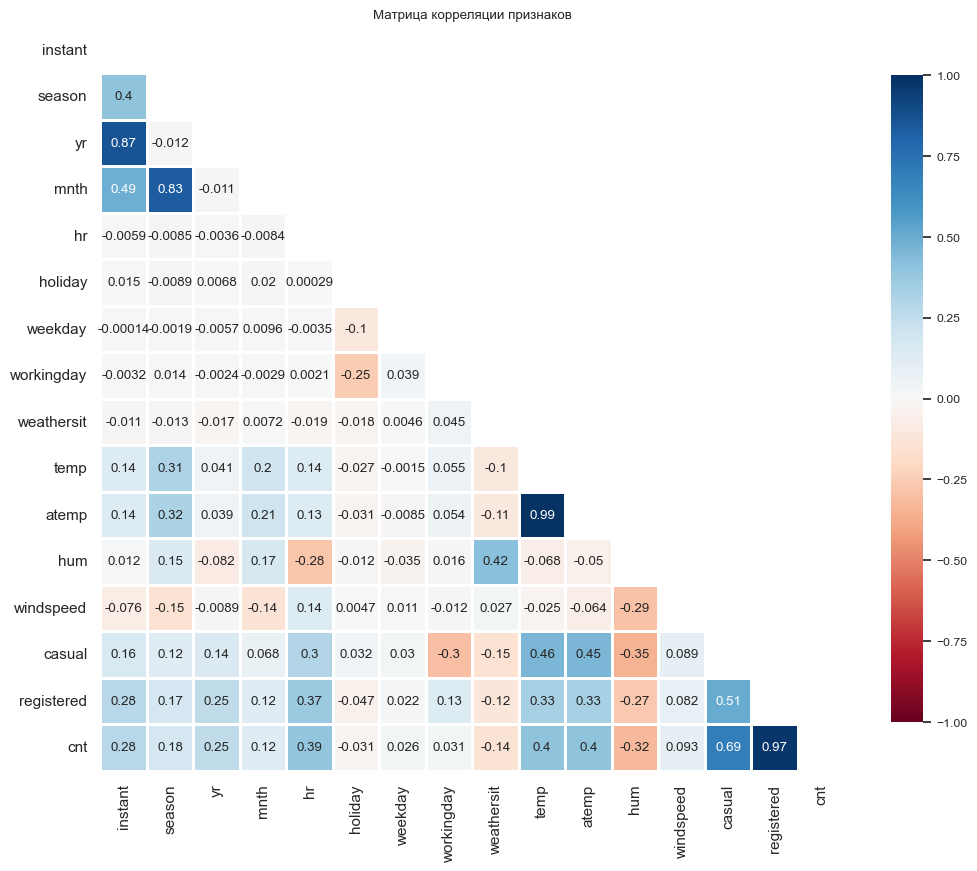

In [14]:
import matplotlib.pyplot as plt
sns.set(style="white")# цвет фона

# построить "маску" для отображения только половины корреляционной матрицы
mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=0.8) # размер шрифта

# Построить тепловую карту
sns.heatmap(
            ##################
            data=corr_df,   ### <<<- объект-матрица корреляции 
            ##################
            vmin=-1, vmax=1, center=0,
            annot=True, 
            cmap = 'RdBu',
            mask=mask,   # применить маску
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
            cbar_kws={"shrink": .7}  # уменьшить размер легенды
           )
plt.title(u'Матрица корреляции признаков')

Коэффициенты корреляции, полученные раннее, переведём в абсолютные значения и отсортируем по возрастанию, чтобы провести их дальнейшую оценку.

In [15]:
# Последовательное применение операции: 
# - получить единственный столбец, 
# - получить абсолютные значения, 
# - отсортировать
corr_df[['cnt']].abs().sort_values(by="cnt")

,cnt
weekday,0.026464
workingday,0.030661
holiday,0.030686
windspeed,0.092522
mnth,0.119390
weathersit,0.141246
season,0.176654
yr,0.250279
instant,0.277639
hum,0.320820


В качестве целевой переменной выберем признак:
- **'cnt'** - Количество арендованных велосипедов.

В качестве независимых переменных выберем признаки с высоким абс. значением коэфф. корреляции, но при этом как можно более не связанные  между собой:
  * **'temp'** - Абсолютная температура
  * **'hr'**- Время суток (час)
  * **'hum'** - Относительная влажность
  * **'season'** - Время года

In [16]:
features = ['temp', 'hr', 'weekday',  'mnth', 'season', 'hum', 'weathersit']
target = ['cnt']

<Figure size 700x700 with 0 Axes>

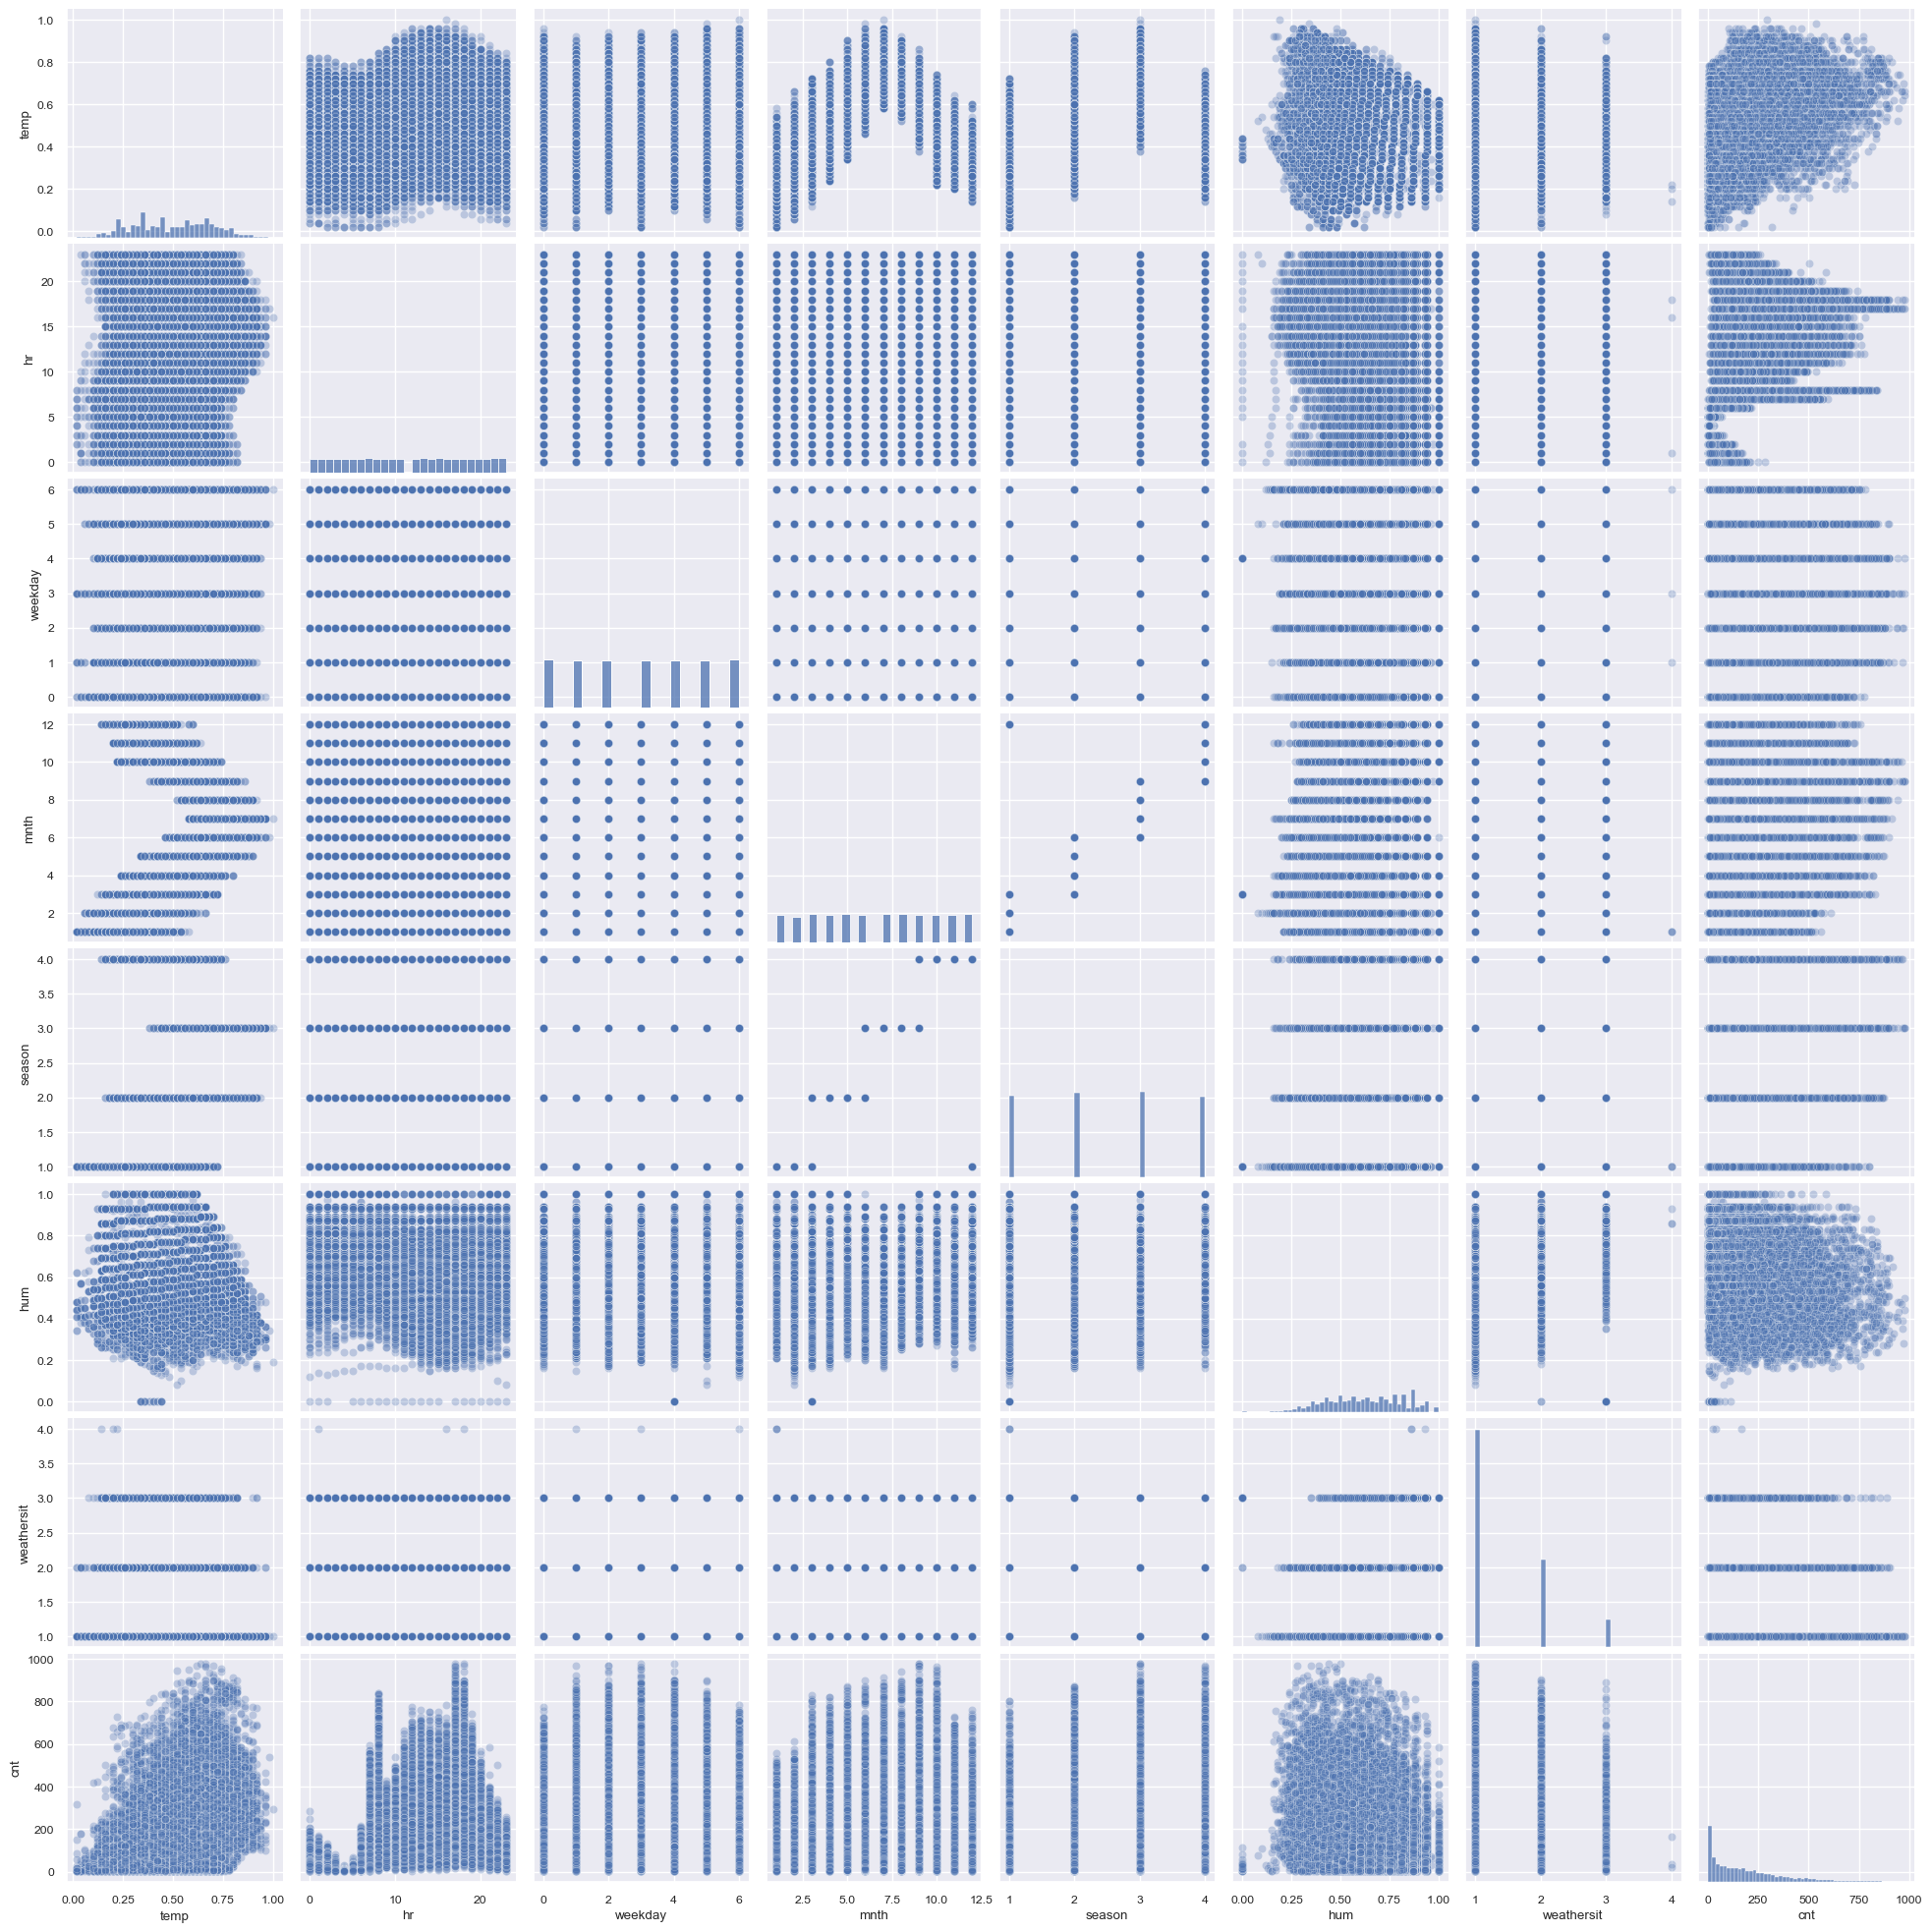

In [42]:
# График признаков попарно
plt.figure(figsize=(7,7))
%config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков

sns.pairplot(
    df[features + target], 
    #hue = 'Type',         # Признак разделения
    kind="scatter",        # Тип даграмм: reg,scatter 
    diag_kind = 'hist',     # Тип диагоральных даграмм: hist, kde
    plot_kws={'alpha': 0.3} # прозрачность точек
);

## Поиск и обработка выбросов
Судя по виду графиков рассеяния в "пустых областях" присутствуют малое кол-во объектов, т.е. в выборе присутствуют аномально малые или большие значения - "выбросы". Для их обработки проведем следующие операции.

In [ ]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (features + target):
    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))
    # На созданном полотне отрисовать boxplot
    sns.boxplot(data=df[feature_name], # данные
                orient='h', # ориентация графика
               ).set(ylabel=feature_name)

In [ ]:
# создадим "словарь"/"хэш-таблицу" для удобного обращения, где ключ - это название признака
tressholdDict = { 
    'temp': (0, 1),
    'hr': (0, 24),
    'hum': (0.1, 1),
    'season': (1, 4),
    'mnth': (1, 12),
    'weekday': (0, 6),
    'weathersit': (1, 4),
    'cnt': (0, 625),
}
print(tressholdDict)

Проверим, какая часть данных выходит за пределы границ значений

In [ ]:
# Цикл: для каждого элемента в словаре/хэш-таблице пройтись по ключам - названиям признаков
for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0] # извлечь нижнее пороговое
    tresshMax =  tressholdDict[feature_name][1] # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(df[
        ~((df[feature_name] >= threesMin) & 
          (df[feature_name] <= tresshMax))
    ])
    dcount = df[feature_name].count() # кол-во эл. общее
    
    print('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format( 
        feature_name, 
        tressholdDict[feature_name],
        over_count,
        dcount,
        over_count / dcount,
    ))

Отфильтруем значения которые находятся вне пороговых.

In [ ]:
# Во избежание путаницы создадим для полседующих операций копию исходного объетка
df_filtred = df.copy()

for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0]
    tresshMax =  tressholdDict[feature_name][1]
    
    # фильтр по двум границам. Оператор "~" -инверсия логических значений
    df_filtred = df_filtred[ 
        (df_filtred[feature_name] >= threesMin ) & (df_filtred[feature_name] <= tresshMax) 
        ]
    print("Обработан ", feature_name )

print(f'Отброшено {len(df) - len(df_filtred)} строк. Осталось {len(df_filtred)} строк.')

In [ ]:
# Строим гистограммы по каждому признаку: 
# data[features].hist() #Упрощенный вывод графиков

plt.figure(figsize=(16, 5))
plot_number = 0

for feature_name in (features+target):
    plot_number += 1

    plt.subplot(1, len(features+target), plot_number)
    
    plt.hist(df_filtred[feature_name]) # Построение гистрограммы
    
    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print(feature_name, 
          df_filtred[feature_name].min(),
          df_filtred[feature_name].max())

## Сохранение данных

In [ ]:
df_filtred.to_csv('./assets/datasets/var20/bike-sharing-dataset_nan_PREPARED.csv', # путь для сохранения
                  index=False, # запрет сохранения "индексов" (тек. номеров строк)
                 )

## Формирование тренировочной и проверочной выборок
Для обучения и проверки качеста модели применяют прием заключающийся в разделении исходной выборки на части:
* Обучающую (Train) - данные, на которых модель формирует коэффициенты
* Проверочную (Test) - данные, которые предявляют обученой модели для получения и сравнения вычисленных(Predicted) значений. 

Для разделения воспользуемся функцией __train_test_split__ из пакета __sklearn__

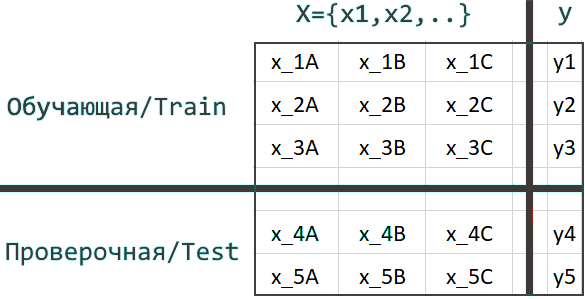

In [ ]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test =  train_test_split(
    df_filtred[features],    # исходные данные X
    df_filtred[target],      # исходные данные y
    
    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
)
print(f'''Кол-во элементов:
x_train: {len(x_train)}, y_train {len(y_train)}
x_test:  {len(x_test)}, y_test  {len(x_test)}
total x: {len(x_train) + len(x_test)}, total y {len(y_train) + len(x_test)}''')

Проверим содержимое обучающей и проверочной частей

In [ ]:
x_test[:3]

In [ ]:
y_test[:3]

# Построение модели
Для получения линейной регрессионной модели созданим экземпляр класс 
__sklearn.linear_model.LinearRegression()__

In [ ]:
lr = linear_model.LinearRegression()

Полученная модель требует процедуры обучения - подбора значений коэфф. для минимизации отличий между вычисленными значениями и предоставленными целевыми (обучающими y). У большинства моделей доступен метод __.fit( x_train,y_train)__

In [ ]:
# Вычислить коэфф. Ki в функции y(x)=Ki*xi + .... + B
# на тренировочном наборе, т.е. обучить модель
lin_model_temp = lr.fit(
    x_train[['temp']], 
    y_train[['cnt']]
)

# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_pred_temp  = lin_model_temp.predict(x_test[['temp']])

Для наглядности построим график рассеяния (он же график разброса, точечный, scatter)

In [ ]:
# Создать полотно для рисования с указаными размерами
plt.figure(figsize=(15,5))

# Нанести график рассеяния - plt.scatter
plt.scatter(x_train[['temp']],  y_train[['cnt']], alpha=0.3, label='Тренировочный') # тренировочный
plt.scatter(x_test[['temp']],   y_test[['cnt']],  alpha=0.3, label='Проверочный')   # проверочный

# Нанести график - линии через точки - plt.plot
label_str = "y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model_temp.coef_[0][0], lin_model_temp.intercept_[0])

plt.plot( x_test[['temp']], y_pred_temp,
            lw=2, color='red', label=label_str)

plt.legend(loc="best")  # положение легенды
plt.xlabel('temp') # подпись осей
plt.ylabel(target[0])   # подпись осей
plt.title(u'График разброса'); # Заголовок

Т.к. модель является линейной имеются некоторые расхождения между реальными и вычисленными значениями - "ошибки". Для оценки точности построим гистограмму распределения ошибок

In [ ]:
plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
#sns.distplot(y_test[['Price']]- y_pred_PriceYearBuilt)
sns.histplot(y_test[['cnt']]- y_pred_temp, 
             color="red", 
             kde=True, # оценка плотности в виде кривой
             stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 10 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

Построим еще пару графиков для визуальной оценки качества модели

In [ ]:
plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['cnt']], y_pred_temp,  alpha=0.1)
plt.scatter(y_test[['cnt']], y_test[['cnt']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['cnt']], (y_test[['cnt']] - y_pred_temp)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

С помощью функций __sklearn.metrics.*__ сравним реальные и вычисленные значениямя и получим важные оценки качества модели

In [ ]:
print ("Линейная одномерная регрессия. Признак 'temp'.")
print ("y_pred_cntTmp (x) = x * {} + {}\n".format(
    lin_model_temp.coef_, lin_model_temp.intercept_))

r2_linRegr_temp   = metrics.r2_score                   (y_test[['cnt']], y_pred_temp)
mae_linRegr_temp  = metrics.mean_absolute_error        (y_test[['cnt']], y_pred_temp)
rmse_linRegr_temp = np.sqrt( metrics.mean_squared_error(y_test[['cnt']], y_pred_temp))


print ("R2 - коэфф. детерминации:        {:>7,.3f}".format               ( r2_linRegr_temp ))
print ("MAE - средняя абсолютная ошибка: {:>7,.3f}".format               ( mae_linRegr_temp ))
print ("RMSE - кв. корень из среднеквадратичной ошибки: {:>7,.3f}".format( rmse_linRegr_temp ))

## Многомерная модель от  НАБОРА#1 переменных (пример: x1, x2, x3, ...) 

In [ ]:
# ваш код

lr_x1x2x3 = linear_model.LinearRegression()

# Вычислить коэфф. на тренировочном наборе, т.е. обучить модель
lin_model_x1x2x3 = lr_x1x2x3.fit(
    x_train[['hr', 'weekday',  'mnth']],
    y_train[['cnt']]
)

# Получить вычисленные(predicted) зн. на проверочном наборе
#y_pred = lin_model_x1x2x3.predict(x_test)
y_pred_x1x2x3  = lin_model_x1x2x3.predict(x_test[['hr', 'weekday',  'mnth']])

In [ ]:
plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
#sns.distplot(y_test[['Price']]- y_pred_PriceYearBuilt)
sns.histplot(y_test[['cnt']] - y_pred_x1x2x3, 
             color="red", 
             kde=True, # оценка плотности в виде кривой
             stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 10 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

In [ ]:
plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['cnt']], y_pred_x1x2x3,  alpha=0.1)
plt.scatter(y_test[['cnt']], y_test[['cnt']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['cnt']], (y_test[['cnt']] - y_pred_x1x2x3)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

In [ ]:
print ("Линейная одномерная регрессия. Признаки 'hr', 'weekday',  'mnth'.")
print ("y_pred_cntHrHumSeason (x) = x * {} + {}\n".format(
    lin_model_x1x2x3.coef_, lin_model_x1x2x3.intercept_))

r2_linRegr_temp   = metrics.r2_score                   (y_test[['cnt']], y_pred_x1x2x3)
mae_linRegr_temp  = metrics.mean_absolute_error        (y_test[['cnt']], y_pred_x1x2x3)
rmse_linRegr_temp = np.sqrt( metrics.mean_squared_error(y_test[['cnt']], y_pred_x1x2x3))

print ("R2 - коэфф. детерминации:        {:>7,.3f}".format               ( r2_linRegr_temp ))
print ("MAE - средняя абсолютная ошибка: {:>7,.3f}".format               ( mae_linRegr_temp ))
print ("RMSE - кв. корень из среднеквадратичной ошибки: {:>7,.3f}".format( rmse_linRegr_temp ))

## Многомерная модель от  НАБОРА#2 переменных (пример: x5, x6, x7, ...) 

In [ ]:
# Вычислить коэфф. Ki в функции y(x)=Ki*xi + .... + B
# на тренировочном наборе, т.е. обучить модель
lin_model_x5x6x7 = lr.fit(
    x_train[['season', 'hum', 'weathersit']], 
    y_train[['cnt']]
)

# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_pred_x4x5x6  = lin_model_x5x6x7.predict(x_test[['season', 'hum', 'weathersit']])

In [ ]:
plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
#sns.distplot(y_test[['Price']]- y_pred_PriceYearBuilt)
sns.histplot(y_test[['cnt']]- y_pred_x4x5x6, 
             color="red", 
             kde=True, # оценка плотности в виде кривой
             stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 10 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

In [ ]:
plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['cnt']], y_pred_x4x5x6,  alpha=0.1)
plt.scatter(y_test[['cnt']], y_test[['cnt']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['cnt']], (y_test[['cnt']] - y_pred_x4x5x6)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

In [ ]:
print ("Линейная одномерная регрессия. Признаки 'season', 'hum', 'weathersit'.")
print ("y_pred_cntTmp (x) = x * {} + {}\n".format(
    lin_model_x5x6x7.coef_, lin_model_x5x6x7.intercept_))

r2_linRegr_temp   = metrics.r2_score                   (y_test[['cnt']], y_pred_x4x5x6)
mae_linRegr_temp  = metrics.mean_absolute_error        (y_test[['cnt']], y_pred_x4x5x6)
rmse_linRegr_temp = np.sqrt( metrics.mean_squared_error(y_test[['cnt']], y_pred_x4x5x6))


print ("R2 - коэфф. детерминации:        {:>7,.3f}".format               ( r2_linRegr_temp ))
print ("MAE - средняя абсолютная ошибка: {:>7,.3f}".format               ( mae_linRegr_temp ))
print ("RMSE - кв. корень из среднеквадратичной ошибки: {:>7,.3f}".format( rmse_linRegr_temp ))

# Итоги. Сравнение полученных моделей
Размеры таблицы
- исходная таблица = Строк x Столбцов **(17379, 17)**
- после искл пропущенных значений = Строк x Столбцов **(17048, 16)**
- после искл выбросов = Строк x Столбцов **(16470, 16)**

In [ ]:
import pandas as pd

ddf = pd.DataFrame (
    {
        "Признак": ['temp', 'hr, weekday, mnth', 'season, hum, weathersit'],
        "K1":      [321,        9.25,       31.57],
        "K2":      [0,          1.078,      -302],
        "K3":      [0,          5.24,       7.19],
        "B":       [13.56,      28,         273],
        "MAE":     [109.565,    105.242,    109.303],
        "RMSE":    [138.354,    135.065,    137.746],
        "R2":      [0.157,      0.197,      0.165],
    }
 )
ddf

# Выводы по работе
Был проведён первичный анализ данных, а также были проведены необходимые операции для дальнейшей работе с ними (отброс нулевых значений, приведение таблицы к числовым параметрам).

После этого мы построили регрессионные модели для выявления линейной зависимости аргументов от количества арендованных велосипедов.